         unmitigated noise is 0.0033
            achieved noise is 0.00304
            expected noise is 0.00296


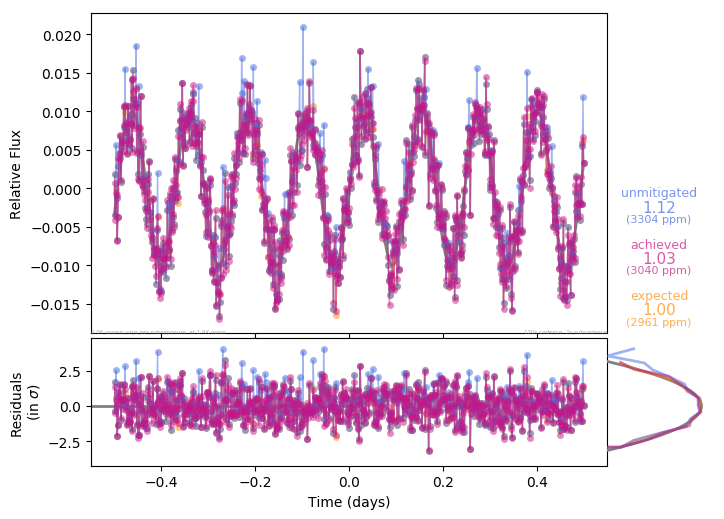

In [18]:
from tesszap.tess import StampCadenceTimeseries
from tesszap.strategies import Central
import numpy as np

# Create a model (a function of time, in days).
def wibblewobble(t):
    amplitude, period = 0.01, 0.1234
    return amplitude*np.sin(2*np.pi*t/period)

# Create a light curve time series, generated from that model.
lc = StampCadenceTimeseries(tmag=12, model=wibblewobble)

# Create a stacking strategy object...
strategy = Central(10)
# ...and use it to zap the cosmic rays in the time series.
lc.stack(strategy)

# Print the noise with and without any mitigation strategy.
for k in lc.rms.keys():
    print('{:>20} noise is {:.3}'.format(k, lc.rms[k]))

# Show a plot of mitigated, unmitigated, and idealized light curves.
%matplotlib inline
lc.plot()

import matplotlib.pyplot as plt
plt.savefig('wibblewobbleexample.png')